<a href="https://colab.research.google.com/github/parangatm/IoT-Security/blob/main/acc_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
lab1a_acc = [50.42, 60.624, 65.222, 67.638, 69.352, 71.238, 72.184, 73.474, 74.416, 75.162, 75.756, 76.704, 77.148, 77.638, 78.21, 78.592, 78.922, 79.35, 79.92, 79.998, 80.484, 80.676, 81.204, 81.764, 81.648, 81.814, 82.118, 82.702, 82.966, 83.282, 83.108, 83.188, 83.824, 83.97, 84.108, 84.26, 84.392, 84.54, 84.94, 84.996, 85.098, 85.336, 85.302, 85.966, 85.54, 85.77, 86.004, 86.234, 85.97, 86.36]

In [ ]:
lab1b_acc = [50.042, 61.772, 65.962, 69.358, 71.414, 73.082, 74.404, 75.586, 76.644, 77.416, 78.456, 78.946, 79.712, 80.042, 80.672, 81.148, 81.948, 82.542, 82.458, 83.36, 83.45, 83.934, 84.012, 84.212, 84.732, 85.006, 85.604, 85.388, 85.672, 86.26, 86.376, 86.65, 86.856, 87.302, 87.14, 87.47, 87.47, 87.95, 88.032, 87.954, 88.266, 88.458, 88.408, 88.648, 88.778, 88.97, 89.174, 89.28, 89.322, 89.376]

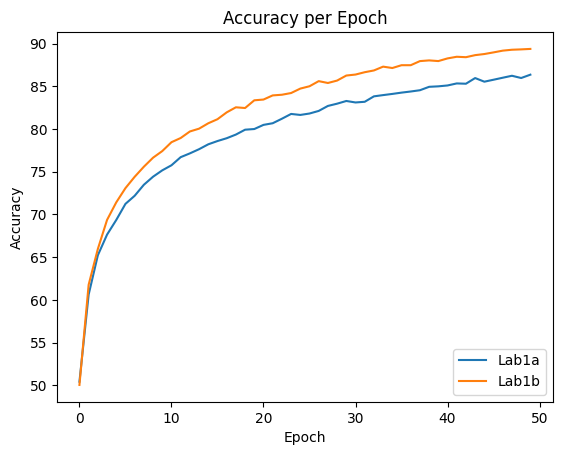

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(lab1a_acc)
plt.plot(lab1b_acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend(["Lab1a", "Lab1b"], loc="lower right")
plt.show()
plt.savefig('Comparison.png')

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached 

In [ ]:
class Lab1aNet(nn.Module):
    # Constructor
    def __init__(self):
        super(Lab1aNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.avgpool1 = nn.AvgPool2d(kernel_size=2)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.avgpool2 = nn.AvgPool2d(kernel_size=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.avgpool3 = nn.AvgPool2d(kernel_size=2)
        self.bn3 = nn.BatchNorm2d(64)
        self.fc = nn.Linear(64*4*4,10)
        self.bn4 = nn.BatchNorm1d(10)
    # Forward Pass
    def forward(self, x):
        x = self.conv1(x)
        x = self.avgpool1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = self.avgpool2(x)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.conv3(x)
        x = self.avgpool3(x)
        x = self.bn3(x)
        x = torch.relu(x)
        x = x.view(-1, 64*4*4)
        x = self.fc(x)
        x = self.bn4(x)
        return x

In [ ]:
Lab1aModel = Lab1aNet()

In [ ]:
import torch
import torch.nn as nn

class Lab1bNet(nn.Module):
    def __init__(self):
        super(Lab1bNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, 3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.fc = nn.Linear(64*4*4, 10)
        self.bn4 = nn.BatchNorm1d(10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = torch.relu(x)
        x = x.view(-1, 64*4*4)
        x = self.fc(x)
        x = self.bn4(x)
        return x

In [ ]:
Lab1bModel = Lab1bNet()

In [ ]:
x = torch.randn(1, 3, 32, 32)
y1a = Lab1aModel(x)
y1b = Lab1bModel(x)

In [ ]:
from torchviz import make_dot
make_dot(y1a.mean(), params=dict(Lab1aModel.named_parameters()))

In [ ]:
class Conv2d_custom(nn.Conv2d):
    ## Same initialization as original class

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        if self.padding_mode != 'zeros':
            input = F.pad(input, self._reversed_padding_repeated_twice,
                          mode=self.padding_mode)

        # Add random Gaussian noise to the input activation
        noise = torch.randn_like(input) * 0.1
        input = input + noise

    ## Same return as the original class